# **READING THE DATA**

In [ ]:
#importing essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings("ignore")

In [ ]:
#reading the csv file

df= pd.read_csv('/content/uci-secom.csv')
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [ ]:
#shape of the dataframe

df.shape

(1567, 592)

In [ ]:
#drop Time column

df= df.drop(['Time'], axis=1)

In [ ]:
#replacing -1 with 0

df.replace(-1, 0, inplace=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,0


In [ ]:
count_0 = df['Pass/Fail'].value_counts().get(0, 0)
count_1 = df['Pass/Fail'].value_counts().get(1, 0)

print("No. of 0 :", count_0)
print("No. of 1 :", count_1)

No. of 0 : 1463
No. of 1 : 104


# **DATA CLEANING**

In [ ]:
columns=df.columns

In [ ]:
#finding the null values in each column

df.isnull().sum().sum()

41951

In [ ]:
#filling the null values with the mean of df
df.fillna(df.mean(), inplace= True)

In [ ]:
#find the descriptive statistics of the dataframe
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.066369
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,54.936224,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,91.549650,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,0.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,97.934373,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,0.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,97.934373,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,0.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
for column in df:
  sns.boxplot(df[column])
  plt.show()

In [ ]:
df_cap= df.copy()

In [ ]:
def outlier_capping(df, columns, factor=1.5):

  for i in columns:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)

    iqr= q3-q1

    upper_limit= q3+(factor*iqr)
    lower_limit= q1-(factor*iqr)

    df[i]= np.where(df[i]>upper_limit, upper_limit, np.where(df[i]<lower_limit, lower_limit, df[i]))

In [ ]:
corr_matrix= df_cap.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,NaN,0.002270,0.031483,-0.052622,0.009045,...,-0.017120,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,NaN,-0.025564,-0.012037,0.031258,0.023964,...,0.054006,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,NaN,-0.136225,-0.146213,0.023528,0.016168,...,-0.007054,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,NaN,-0.685835,0.073856,-0.102892,0.068215,...,-0.071311,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.347734,-0.025946,0.054206,...,0.088167,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,NaN,-0.041209,0.058113,0.010433,0.033738,...,-0.283333,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,NaN,0.034027,-0.021426,0.022845,0.059301,...,0.272404,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,NaN,0.032227,-0.020893,0.026250,0.060758,...,0.258745,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,NaN,0.043777,-0.107804,-0.022770,0.004880,...,0.585288,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [ ]:
corr_matrix.drop(columns=['5'], inplace=True)

In [ ]:
corr_matrix

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,...,-0.017120,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,-0.012037,0.031258,0.023964,0.009645,...,0.054006,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,-0.146213,0.023528,0.016168,0.069893,...,-0.007054,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,0.073856,-0.102892,0.068215,0.049873,...,-0.071311,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.347734,-0.025946,0.054206,-0.006470,...,0.088167,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,-0.041209,0.058113,0.010433,0.033738,0.000327,...,-0.283333,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,0.034027,-0.021426,0.022845,0.059301,0.046965,...,0.272404,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,0.032227,-0.020893,0.026250,0.060758,0.046048,...,0.258745,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,0.043777,-0.107804,-0.022770,0.004880,0.008393,...,0.585288,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [ ]:
corr_matrix["Pass/Fail"]

,Pass/Fail
0,-0.025141
1,-0.002603
2,-0.000957
3,-0.024623
4,-0.013756
5,NaN
6,0.016239
7,0.012991
8,0.028016
9,-0.031191


# ***SPLITING THE DATA***

In [ ]:
inputs= df_cap.drop('Pass/Fail', axis='columns')
target= df_cap['Pass/Fail']

In [ ]:
X=inputs

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,0.004700,203.172000,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,0.005396,97.934373,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,0.002500,43.523100,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,0.007500,93.494100,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100


In [ ]:
y=target

In [ ]:
y

,Pass/Fail
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# **TRAINING THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X ,y ,test_size=0.2, ramdom_state=100)

In [ ]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((1253, 590), (314, 590), (1253,), (314,))

# **SCALING THE DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_data= StandardScaler()

In [ ]:
X_train= scaled_data.fit_transform(X_train)
X_test= scaled_data.transform(X_test)

# ***MACHINE LEARNING ALGORITHMS***

**DECISION TREE ALGORITHM**

In [ ]:
from sklearn import tree
model= tree.DecisionTreeClassifier()
model.fit(X_train, y_train) #fitting the model to learn from the training data

DecisionTreeClassifier()

In [ ]:
f_imp= model.feature_importances_
f_imp

array([0.        , 0.        , 0.00623321, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03715279, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00793326, 0.        , 0.        , 0.        ,
       0.01214352, 0.01267339, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02568122, 0.0085068 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03915059, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05505943,
       0.        , 0.        , 0.        , 0.01512611, 0.02450771,
       0.05180661, 0.        , 0.01250213, 0.        , 0.        ,
       0.        , 0.00612954, 0.        , 0.        , 0.     

In [ ]:
y_prediction= model.predict(X_test)
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

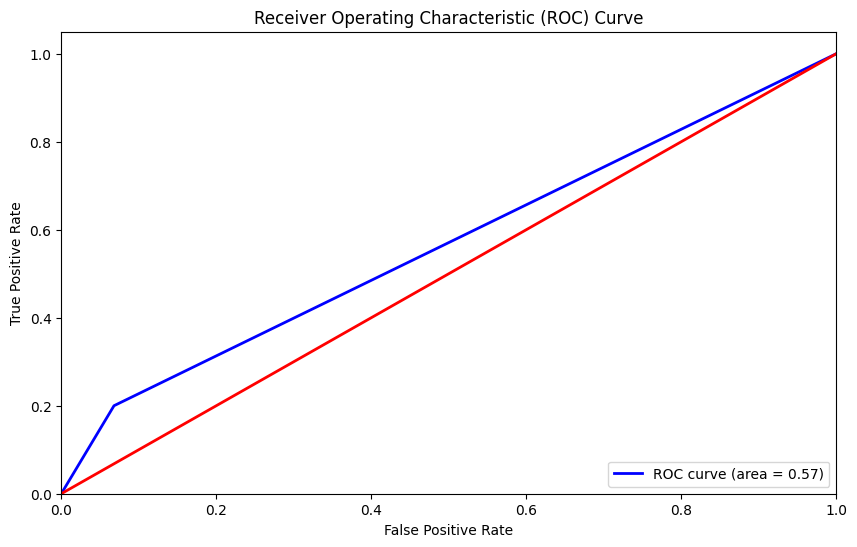

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test, y_prediction)
score

0.8853503184713376

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix #to show how well our model has worked
print("The confusion matrix is \n")
confusion_matrix(y_test, y_prediction)

The confusion matrix is 



array([[274,  20],
       [ 16,   4]])

**LOGISTIC REGRESSION ALGORITHM**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
Log_reg_model= LogisticRegression()
Log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
Log_pred= Log_reg_model.predict(X_test)
Log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

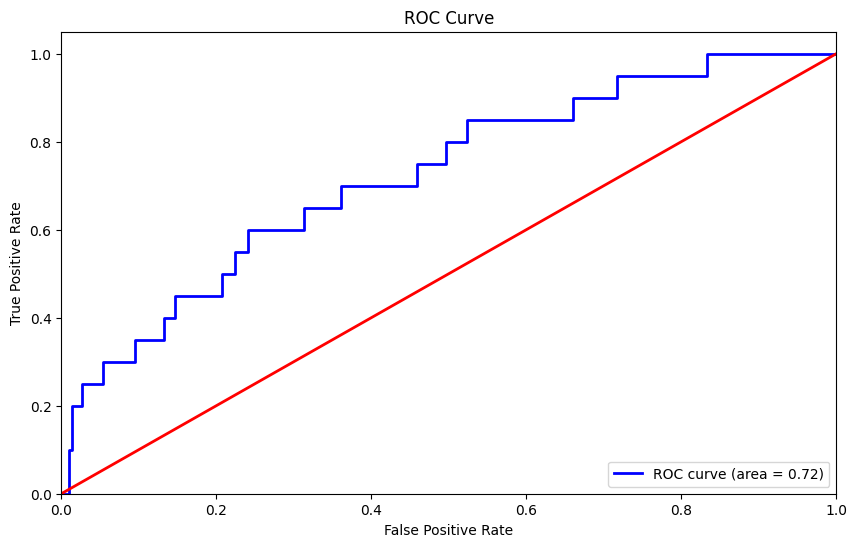

In [ ]:
Log_prob = Log_reg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, Log_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
score= accuracy_score(y_test, Log_pred)
score

0.910828025477707

In [ ]:
from sklearn.metrics import confusion_matrix #to show how well our model has worked
confusion_matrix(y_test, Log_pred)

array([[281,  13],
       [ 15,   5]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Log_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       294
           1       0.28      0.25      0.26        20

    accuracy                           0.91       314
   macro avg       0.61      0.60      0.61       314
weighted avg       0.91      0.91      0.91       314



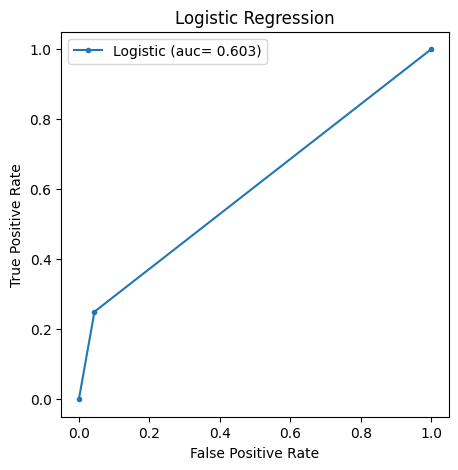

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, Log_pred)
Log_auc= auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi= 100)
plt.plot(fpr, tpr, marker= '.', label='Logistic (auc= %0.3f)' % Log_auc)
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_train= pca.fit_transform(X_train)
pca_test= pca.transform(X_test)

eigenvalues = pca.explained_variance_

# Apply Kaiser Stopping Rule
kaiser_rule = eigenvalues > 1
components_to_retain = np.sum(kaiser_rule)

print("Components to retain: ", components_to_retain)
print("\n")
print("Eigenvalues: ", eigenvalues)
print("\n")
print("Kaiser Rule: ", kaiser_rule)


Components to retain:  114


Eigenvalues:  [2.72150246e+01 1.77241852e+01 1.37446380e+01 1.22747426e+01
 1.06655497e+01 9.98074763e+00 9.00901959e+00 8.98262190e+00
 8.01621450e+00 7.84074955e+00 7.02757942e+00 6.52367860e+00
 6.34990419e+00 6.24758231e+00 6.00898291e+00 5.74804573e+00
 5.63446271e+00 5.54689110e+00 5.47374505e+00 5.30469489e+00
 5.09641106e+00 4.93571803e+00 4.69824383e+00 4.62719896e+00
 4.49614767e+00 4.44187342e+00 4.27885317e+00 4.17500129e+00
 4.11272192e+00 4.03918496e+00 4.02372501e+00 3.94540722e+00
 3.84155798e+00 3.77618111e+00 3.71504741e+00 3.64762453e+00
 3.58861498e+00 3.50790187e+00 3.48286914e+00 3.38868272e+00
 3.34117218e+00 3.33102836e+00 3.21988136e+00 3.11469460e+00
 3.10709352e+00 3.06560275e+00 3.03798448e+00 2.98087418e+00
 2.93738371e+00 2.85684725e+00 2.83422011e+00 2.77408679e+00
 2.75513521e+00 2.69936258e+00 2.67139104e+00 2.61940669e+00
 2.55077185e+00 2.54837720e+00 2.47164563e+00 2.44853759e+00
 2.37454247e+00 2.36506941e+00 2.32959803e

In [ ]:
eigenvalues = pca.explained_variance_

In [ ]:
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

In [ ]:
eigenvalues.tolist()

[27.215024609229722,
 17.724185204474473,
 13.744638031163191,
 12.27474260397163,
 10.665549678830395,
 9.980747627961101,
 9.009019591508373,
 8.98262190138557,
 8.016214499909108,
 7.840749551215704,
 7.027579419456045,
 6.523678600019554,
 6.349904191865408,
 6.247582309965099,
 6.008982913926693,
 5.748045727386906,
 5.634462708962149,
 5.546891096735596,
 5.473745052912156,
 5.304694886771583,
 5.096411059822873,
 4.935718026792012,
 4.698243832117844,
 4.627198960911579,
 4.496147667969171,
 4.441873420135077,
 4.278853169531516,
 4.175001294289029,
 4.112721920175859,
 4.039184960229225,
 4.023725009602495,
 3.9454072228271087,
 3.8415579821534043,
 3.776181113722683,
 3.715047413372396,
 3.647624527217248,
 3.5886149765206143,
 3.5079018689140624,
 3.4828691432674295,
 3.388682716908796,
 3.341172177778178,
 3.3310283638876657,
 3.219881359705334,
 3.1146945959553305,
 3.1070935198677305,
 3.065602753192305,
 3.037984481834384,
 2.9808741778185364,
 2.937383705609493,
 2.85684

In [ ]:
top_10_eigenvalues = sorted_eigenvalues[:10]

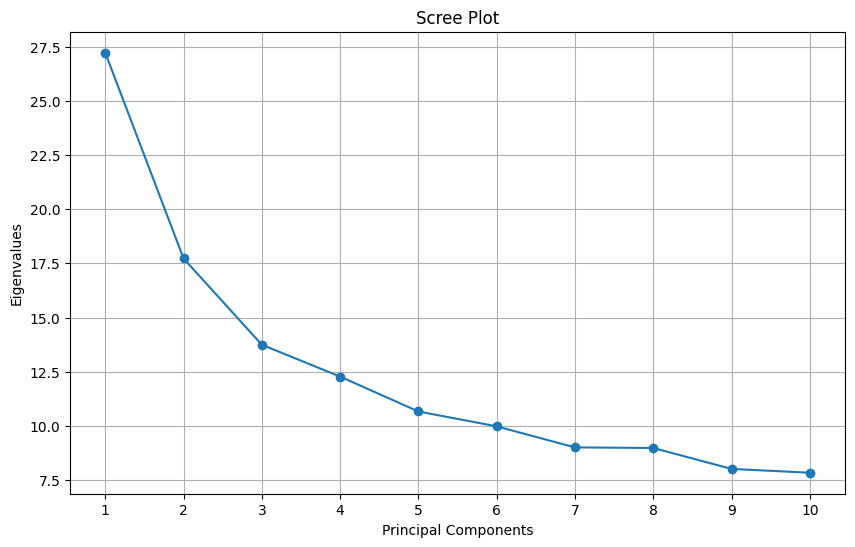

In [ ]:
#Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(top_10_eigenvalues) + 1), top_10_eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.xticks(np.arange(1, len(top_10_eigenvalues) + 1))
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=components_to_retain)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [ ]:
pca_model= LogisticRegression()
pca_model.fit(pca_train, y_train)

LogisticRegression()

In [ ]:
Log_pred_pca= pca_model.predict(pca_test)
Log_pred_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
score= accuracy_score(y_test, Log_pred_pca)
score

0.9299363057324841

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix #to show how well our model has worked
confusion_matrix(y_test, Log_pred_pca)

array([[290,   4],
       [ 18,   2]])

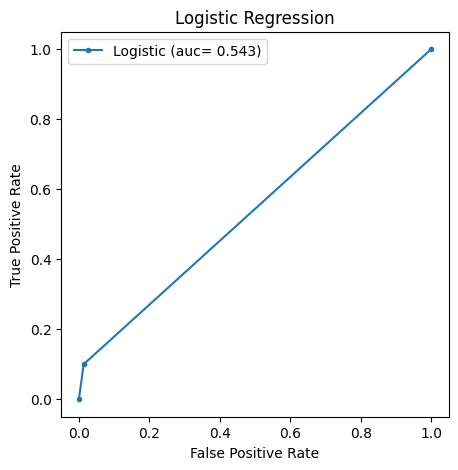

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, Log_pred_pca)
Log_auc= auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi= 100)
plt.plot(fpr, tpr, marker= '.', label='Logistic (auc= %0.3f)' % Log_auc)
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Log_pred_pca))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       294
           1       0.33      0.10      0.15        20

    accuracy                           0.93       314
   macro avg       0.64      0.54      0.56       314
weighted avg       0.90      0.93      0.91       314



# **Kernel PCA**

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score

kpca = KernelPCA(n_components= components_to_retain)
X_kpca = kpca.fit_transform(X_train)
X_test_kpca= kpca.transform(X_test)

# Train a Support Vector Classifier
svc = SVC()
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(svc, param_grid=params, cv=5, scoring='precision_macro')
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy", accuracy)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy 0.9394904458598726
Precision: 0.76
Recall: 0.59


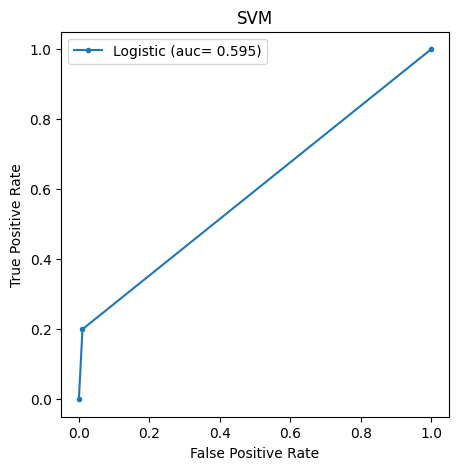

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
SVM_auc= auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi= 100)
plt.plot(fpr, tpr, marker= '.', label='Logistic (auc= %0.3f)' % SVM_auc)
plt.title('SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
SVM = SVC()
SVM.fit(X_kpca, y_train)

SVC()

In [ ]:
SVM_kpca= SVM.predict(X_test_kpca)
SVM_kpca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy = accuracy_score(y_test, SVM_kpca)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


# **Kernel- Poly**

In [ ]:
kpca = KernelPCA(n_components=components_to_retain, kernel='poly', degree=3, coef0=1)
X_kpca = kpca.fit_transform(X_train)
X_test_kpca= kpca.transform(X_test)
print(X_kpca)
print("\n")
print(X_test_kpca)

[[-0.15277835 -0.11861783 -0.12013377 ... -0.03443252  0.00516309
   0.12767997]
 [-0.16110217 -0.11858812 -0.1310214  ...  0.01110626 -0.16409083
   0.03798597]
 [-0.15614672 -0.11271158 -0.11566898 ... -0.07569146 -0.13197534
  -0.09701311]
 ...
 [-0.15804852 -0.12194353 -0.12805861 ...  0.23640027  0.04513359
   0.09220205]
 [-0.15231043 -0.11733606 -0.1189771  ... -0.09279563 -0.01979449
  -0.05864187]
 [-0.15699325 -0.11828194 -0.12871368 ...  0.07433159  0.23333177
  -0.05239465]]


[[-0.15898853 -0.11992914 -0.12388848 ...  0.00182144 -0.03360317
   0.01589861]
 [-0.15402167 -0.1151532  -0.12470193 ... -0.00534203  0.02682823
   0.0888819 ]
 [-0.1606864  -0.11840046 -0.12724258 ...  0.03421579  0.0320951
  -0.18426532]
 ...
 [-0.15589973 -0.11475558 -0.12016427 ...  0.02132618 -0.04445936
  -0.00491823]
 [-0.15525202 -0.11816123 -0.11939009 ... -0.08048612  0.03217282
   0.09461604]
 [-0.15715869 -0.11968145 -0.12773937 ... -0.14666291  0.01279437
  -0.08224743]]


In [ ]:
classifier= SVC()
classifier.fit(X_kpca, y_train)

SVC()

In [ ]:
SVM_pred_poly= classifier.predict(X_test_kpca)
SVM_pred_poly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy= accuracy_score(y_test, SVM_pred_poly)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [ ]:
precision = precision_score(y_test,SVM_pred_poly, average='macro')
recall = recall_score(y_test, SVM_pred_poly, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.4681528662420382
Recall:  0.5


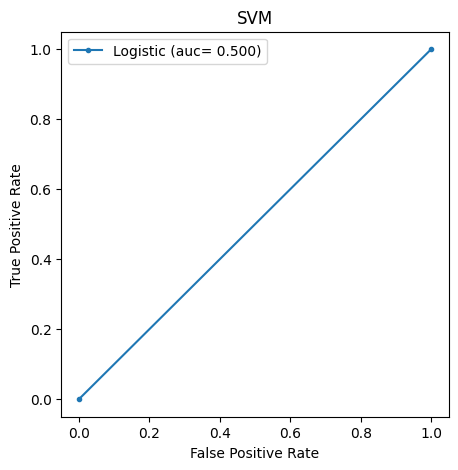

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, SVM_pred_poly)
SVM_auc= auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi= 100)
plt.plot(fpr, tpr, marker= '.', label='Logistic (auc= %0.3f)' % SVM_auc)
plt.title('SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **Kernel- Linear**

In [ ]:
kpca = KernelPCA(n_components=components_to_retain, kernel='linear')
X_kpca = kpca.fit_transform(X_train)
X_test_kpca= kpca.transform(X_test)
print(X_kpca)
print("\n")
print(X_test_kpca)

[[ 0.81070493  1.58402949  0.07078195 ... -0.4743766   0.42881197
  -0.87327172]
 [-2.70036307  1.1961774  -1.71850327 ...  1.90558594  0.31989268
  -1.89241621]
 [ 1.00391926 -0.0997566   1.78785572 ... -0.26310689  0.03434044
  -0.99385636]
 ...
 [-1.36375123 -1.94033945 -0.48104566 ...  0.78128012  0.73068344
  -1.31612901]
 [ 0.94427346 -2.97003173 -3.00154815 ...  0.0697942   0.50152108
  -0.54879422]
 [-1.14974516 -1.48508003 -1.46715731 ... -1.52307405  1.2171626
   0.82064943]]


[[-1.17985489 -0.84904411 -0.84753837 ... -1.07800295  0.15542682
  -1.58940808]
 [ 0.4816821  -1.6033317  -0.22688167 ... -0.76424753  0.058875
   0.05554958]
 [-1.82335081 -0.85440473  0.68969458 ... -1.54041339  3.13059697
  -2.04727155]
 ...
 [ 0.66533383  1.09746155  3.77878709 ... -1.17403783  0.57649903
  -0.42204554]
 [ 0.62059162 -1.61262006  0.30882656 ...  1.05760735  0.59949589
  -0.19932952]
 [-1.0564761   2.14581935  0.50297643 ... -1.76938632  0.89507775
   0.12579849]]


In [ ]:
classifier= SVC()
classifier.fit(X_kpca, y_train)

SVC()

In [ ]:
SVM_pred_linear= classifier.predict(X_test_kpca)
SVM_pred_linear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy= accuracy_score(y_test, SVM_pred_linear)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [ ]:
precision = precision_score(y_test,SVM_pred_linear, average='macro')
recall = recall_score(y_test, SVM_pred_linear, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.4681528662420382
Recall:  0.5


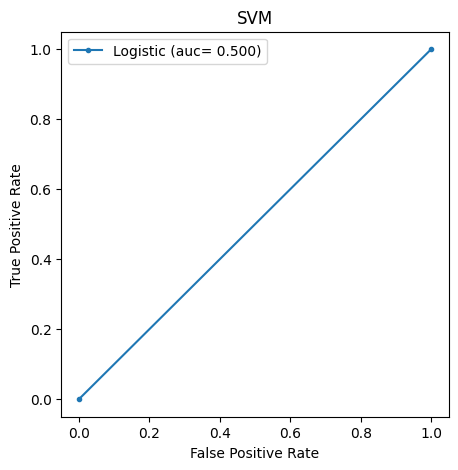

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, SVM_pred_linear)
SVM_auc= auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi= 100)
plt.plot(fpr, tpr, marker= '.', label='Logistic (auc= %0.3f)' % SVM_auc)
plt.title('SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ***DEEP LEARNING ALGORITHMS***

In [ ]:
#CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

In [ ]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 588, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 294, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 292, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 146, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 9344)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
#trainig the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
40/40 [==============================] - 3s 48ms/step - loss: 0.2931 - accuracy: 0.9258 - val_loss: 0.2488 - val_accuracy: 0.9363
Epoch 2/50
40/40 [==============================] - 2s 60ms/step - loss: 0.2301 - accuracy: 0.9330 - val_loss: 0.2266 - val_accuracy: 0.9363
Epoch 3/50
40/40 [==============================] - 2s 54ms/step - loss: 0.2140 - accuracy: 0.9330 - val_loss: 0.2309 - val_accuracy: 0.9363
Epoch 4/50
40/40 [==============================] - 2s 43ms/step - loss: 0.1884 - accuracy: 0.9338 - val_loss: 0.2223 - val_accuracy: 0.9363
Epoch 5/50
40/40 [==============================] - 2s 40ms/step - loss: 0.1694 - accuracy: 0.9338 - val_loss: 0.2354 - val_accuracy: 0.9363
Epoch 6/50
40/40 [==============================] - 2s 40ms/step - loss: 0.1586 - accuracy: 0.9370 - val_loss: 0.2754 - val_accuracy: 0.9363
Epoch 7/50
40/40 [==============================] - 2s 40ms/step - loss: 0.1403 - accuracy: 0.9393 - val_loss: 0.2410 - val_accuracy: 0.9268
Epoch 8/50
40

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

10/10 [==============================] - 0s 8ms/step - loss: 1.0331 - accuracy: 0.9204
Test Accuracy: 92.04%


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int).flatten()  # Convert probabilities to binary class labels

# Generate the classification report
print(classification_report(y_test, y_pred_classes))

10/10 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       294
           1       0.14      0.05      0.07        20

    accuracy                           0.92       314
   macro avg       0.54      0.51      0.52       314
weighted avg       0.89      0.92      0.90       314



In [ ]:
#ann

# Initialize the ANN
model_ann = Sequential()

# Adds input layer
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Adds hidden layer
model_ann.add(Dense(units=32, activation='relu'))

# Adds output layer
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compiles the ANN
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_ann.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                37824     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 39937 (156.00 KB)
Trainable params: 39937 (156.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training of ANN
history = model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
40/40 [==============================] - 1s 8ms/step - loss: 0.4050 - accuracy: 0.8627 - val_loss: 0.2354 - val_accuracy: 0.9363
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.9354 - val_loss: 0.2223 - val_accuracy: 0.9363
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9433 - val_loss: 0.2179 - val_accuracy: 0.9331
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.9473 - val_loss: 0.2199 - val_accuracy: 0.9331
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9601 - val_loss: 0.2262 - val_accuracy: 0.9299
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9705 - val_loss: 0.2349 - val_accuracy: 0.9299
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9888 - val_loss: 0.2499 - val_accuracy: 0.9299
Epoch 8/50
40/40 [==

In [ ]:
loss, accuracy = model_ann.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

10/10 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.9268
Test Accuracy: 92.68%


In [ ]:
y_pred = model_ann.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int).flatten()  # Convert probabilities to binary class labels

# Generate the classification report
print(classification_report(y_test, y_pred_classes))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       294
           1       0.00      0.00      0.00        20

    accuracy                           0.93       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.88      0.93      0.90       314

